In [1]:
from dataset.latent_dataset import LatentDataset

In [2]:
dataset = LatentDataset('ddim_inter_latents/all')

Loading latent from ddim_inter_latents/ddim_250/latents_glasses_intermediates_1019.pt
Loading latent from ddim_inter_latents/ddim_250/latents_glasses_intermediates_1039.pt
Loading latent from ddim_inter_latents/ddim_250/latents_glasses_intermediates_1059.pt
Loading latent from ddim_inter_latents/ddim_250/latents_glasses_intermediates_1079.pt
Loading latent from ddim_inter_latents/ddim_250/latents_glasses_intermediates_1099.pt
Loading latent from ddim_inter_latents/ddim_250/latents_glasses_intermediates_1119.pt
Loading latent from ddim_inter_latents/ddim_250/latents_glasses_intermediates_1139.pt


KeyboardInterrupt: 

In [3]:
l, a = dataset[5000]
print(l.shape)
print(a.shape)

torch.Size([3, 64, 64])
torch.Size([1, 22])


tensor(-3.2192) tensor(2.9032)


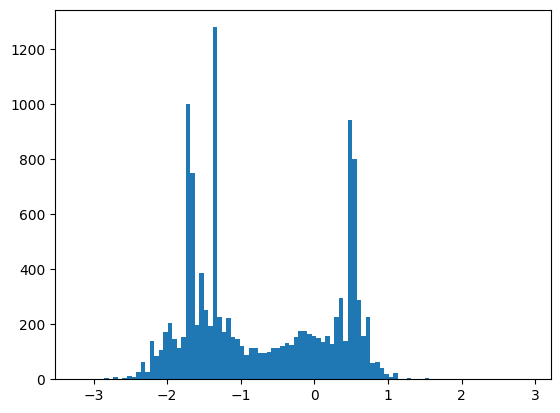

In [4]:
# print min and max values
print(l.min(), l.max())

# dist of l values
import matplotlib.pyplot as plt
plt.hist(l.flatten(), bins=100)
plt.show()

In [5]:
# calculate whole dataset mean and std
import torch

l_mean = torch.zeros_like(l)
l_std = torch.zeros_like(l)
for i in range(len(dataset)):
    l, a = dataset[i]
    l_mean += l
    l_std += l ** 2

l_mean /= len(dataset)
l_std /= len(dataset)

l_std = torch.sqrt(l_std - l_mean ** 2)

print(l_mean)
print(l_std)

tensor([[[-0.2721,  0.6548,  0.1649,  ...,  0.0665,  0.1616, -0.2910],
         [-1.4060, -0.6354, -0.7909,  ..., -0.6529, -1.3082, -0.0237],
         [-0.7392, -0.1941, -0.4653,  ..., -0.3069, -0.7867, -0.0861],
         ...,
         [-0.9678, -0.0982, -0.6707,  ..., -0.3066, -0.6456, -0.1812],
         [-0.8957,  0.1639, -0.4613,  ..., -0.4162, -0.5799,  0.2901],
         [-0.7288, -0.8623, -1.0188,  ..., -0.8638, -1.1204, -0.6591]],

        [[ 0.2311, -0.1922, -0.1938,  ..., -0.1190, -0.3229, -0.5167],
         [-0.2565, -0.3806, -0.3646,  ..., -0.0941, -0.3438, -0.2811],
         [-0.0156, -0.2531, -0.2753,  ..., -0.1009, -0.1509, -0.0733],
         ...,
         [-0.0280, -0.3955, -0.5715,  ..., -0.1958, -0.2658, -0.3234],
         [-0.2063, -0.5990, -0.7346,  ..., -0.1907, -0.4955, -0.5651],
         [-0.3294, -0.0502,  0.0123,  ..., -0.0037, -0.1572, -0.0720]],

        [[-0.1294,  0.3453,  0.2116,  ...,  0.1320,  0.2472,  0.3498],
         [-0.1840,  0.0435,  0.0652,  ...,  0

In [6]:
print(l_mean.shape)

torch.Size([3, 64, 64])


In [7]:
del dataset

In [2]:
# standardize each image and save as image
import os
import numpy as np
from tqdm import tqdm
from PIL import Image 

import glob 
import os
import pandas as pd

#column_names = ['id', 'file_name', 'origin_name', 'Male', 'Young', 'Bald', 'Bangs', 'Receding_Hairline', 'Black_Hair', 'Blond_Hair', 'Brown_Hair', 'Gray_Hair', 'Straight_Hair', 'Wavy_Hair', 'No_Beard', 'Goatee', 'Mustache', 'Sideburns', 'Narrow_Eyes', 'Oval_Face', 'Pale_Skin', 'Pointy_Nose', 'Eyeglasses', 'Heavy_Makeup', 'Wearing_Lipstick']

column_names = ['id', 'file_name', 'origin_name', 'Male', 'Young', 'Bald', 'Bangs', 'Receding_Hairline', 'Black_Hair', 'Blond_Hair', 'Brown_Hair', 'Gray_Hair', 'Straight_Hair', 'Wavy_Hair', 'No_Beard', 'Goatee', 'Mustache', 'Sideburns', 'Narrow_Eyes', 'Oval_Face', 'Pale_Skin', 'Pointy_Nose', 'Big_Nose']

attribute_names = column_names[3:]

img_index = 0

for fname in glob.glob(os.path.join('/mnt/g/data/latents/700/raw/big_nose', '*.pt')):
    print('Loading latent from {}'.format(fname))

    attribute_df = pd.DataFrame(columns=column_names)

    dataset = LatentDataset(fname)

    os.makedirs('/mnt/g/data/latents/700/processed/big_nose', exist_ok=True)
    for i in tqdm(range(len(dataset))):
        l, a = dataset[i]
        '''
        l = (l - l_mean) / l_std
        l = np.clip(l, -3, 3)
        l = (l + 3) / 6 * 255
        # convert to numpy array
        l = l.cpu().numpy().astype(np.uint8)

        l = l.transpose(1, 2, 0)

        #print(l.min(), l.max())


        l = Image.fromarray(l)
        l.save(f'ddim_inter_latents/test_latents_standardized/{i}.png')
        '''

        # save l as a numpy array
        l = l.cpu().numpy()
        np.save(f'/mnt/g/data/latents/700/processed/big_nose/{img_index}.npy', l)
       
        # add attribute to dataframe
        dict = {'id': img_index, 'origin_name': fname, 'file_name': f'{img_index}.npy'}

        a = a[0]

        for j in range(0, len(a)):
            dict[attribute_names[j]] = a[j].item()

        attribute_df.loc[img_index] = dict

        img_index += 1

    # save attribute
    attribute_df.to_csv('/mnt/g/data/latents/700/processed/big_nose/attributes.csv', index=False, mode='a')



Loading latent from /mnt/g/data/latents/700/raw/big_nose/latents_nose_intermediates_104.pt
torch.Size([50000, 3, 64, 64]) torch.Size([50000, 20])


100%|██████████| 50000/50000 [04:16<00:00, 195.04it/s]


Loading latent from /mnt/g/data/latents/700/raw/big_nose/latents_nose_intermediates_109.pt
torch.Size([50000, 3, 64, 64]) torch.Size([50000, 20])


100%|██████████| 50000/50000 [04:11<00:00, 198.52it/s]


Loading latent from /mnt/g/data/latents/700/raw/big_nose/latents_nose_intermediates_114.pt
torch.Size([50000, 3, 64, 64]) torch.Size([50000, 20])


100%|██████████| 50000/50000 [04:19<00:00, 192.70it/s]


Loading latent from /mnt/g/data/latents/700/raw/big_nose/latents_nose_intermediates_119.pt
torch.Size([50000, 3, 64, 64]) torch.Size([50000, 20])


100%|██████████| 50000/50000 [03:57<00:00, 210.35it/s]


Loading latent from /mnt/g/data/latents/700/raw/big_nose/latents_nose_intermediates_124.pt
torch.Size([50000, 3, 64, 64]) torch.Size([50000, 20])


100%|██████████| 50000/50000 [03:53<00:00, 213.88it/s]


Loading latent from /mnt/g/data/latents/700/raw/big_nose/latents_nose_intermediates_129.pt
torch.Size([50000, 3, 64, 64]) torch.Size([50000, 20])


100%|██████████| 50000/50000 [04:00<00:00, 208.22it/s]


Loading latent from /mnt/g/data/latents/700/raw/big_nose/latents_nose_intermediates_134.pt
torch.Size([50000, 3, 64, 64]) torch.Size([50000, 20])


100%|██████████| 50000/50000 [04:01<00:00, 206.63it/s]


Loading latent from /mnt/g/data/latents/700/raw/big_nose/latents_nose_intermediates_139.pt
torch.Size([50000, 3, 64, 64]) torch.Size([50000, 20])


100%|██████████| 50000/50000 [03:55<00:00, 212.58it/s]


Loading latent from /mnt/g/data/latents/700/raw/big_nose/latents_nose_intermediates_14.pt
torch.Size([50000, 3, 64, 64]) torch.Size([50000, 20])


100%|██████████| 50000/50000 [03:51<00:00, 215.59it/s]


Loading latent from /mnt/g/data/latents/700/raw/big_nose/latents_nose_intermediates_144.pt
torch.Size([50000, 3, 64, 64]) torch.Size([50000, 20])


100%|██████████| 50000/50000 [04:00<00:00, 207.61it/s]


Loading latent from /mnt/g/data/latents/700/raw/big_nose/latents_nose_intermediates_149.pt
torch.Size([50000, 3, 64, 64]) torch.Size([50000, 20])


100%|██████████| 50000/50000 [03:57<00:00, 210.56it/s]


Loading latent from /mnt/g/data/latents/700/raw/big_nose/latents_nose_intermediates_154.pt
torch.Size([50000, 3, 64, 64]) torch.Size([50000, 20])


100%|██████████| 50000/50000 [03:56<00:00, 211.22it/s]


Loading latent from /mnt/g/data/latents/700/raw/big_nose/latents_nose_intermediates_159.pt
torch.Size([50000, 3, 64, 64]) torch.Size([50000, 20])


100%|██████████| 50000/50000 [04:03<00:00, 205.29it/s]


Loading latent from /mnt/g/data/latents/700/raw/big_nose/latents_nose_intermediates_164.pt
torch.Size([50000, 3, 64, 64]) torch.Size([50000, 20])


100%|██████████| 50000/50000 [03:54<00:00, 212.90it/s]


Loading latent from /mnt/g/data/latents/700/raw/big_nose/latents_nose_intermediates_169.pt
torch.Size([50000, 3, 64, 64]) torch.Size([50000, 20])


100%|██████████| 50000/50000 [04:14<00:00, 196.60it/s]


Loading latent from /mnt/g/data/latents/700/raw/big_nose/latents_nose_intermediates_174.pt
torch.Size([50000, 3, 64, 64]) torch.Size([50000, 20])


100%|██████████| 50000/50000 [04:28<00:00, 186.50it/s]


Loading latent from /mnt/g/data/latents/700/raw/big_nose/latents_nose_intermediates_179.pt
torch.Size([50000, 3, 64, 64]) torch.Size([50000, 20])


100%|██████████| 50000/50000 [03:57<00:00, 210.24it/s]


Loading latent from /mnt/g/data/latents/700/raw/big_nose/latents_nose_intermediates_184.pt
torch.Size([50000, 3, 64, 64]) torch.Size([50000, 20])


100%|██████████| 50000/50000 [03:51<00:00, 215.69it/s]


Loading latent from /mnt/g/data/latents/700/raw/big_nose/latents_nose_intermediates_189.pt
torch.Size([50000, 3, 64, 64]) torch.Size([50000, 20])


100%|██████████| 50000/50000 [03:57<00:00, 210.67it/s]


Loading latent from /mnt/g/data/latents/700/raw/big_nose/latents_nose_intermediates_19.pt
torch.Size([50000, 3, 64, 64]) torch.Size([50000, 20])


100%|██████████| 50000/50000 [03:58<00:00, 209.30it/s]


Loading latent from /mnt/g/data/latents/700/raw/big_nose/latents_nose_intermediates_194.pt
torch.Size([50000, 3, 64, 64]) torch.Size([50000, 20])


100%|██████████| 50000/50000 [03:54<00:00, 212.95it/s]


Loading latent from /mnt/g/data/latents/700/raw/big_nose/latents_nose_intermediates_199.pt
torch.Size([50000, 3, 64, 64]) torch.Size([50000, 20])


100%|██████████| 50000/50000 [04:01<00:00, 207.01it/s]


Loading latent from /mnt/g/data/latents/700/raw/big_nose/latents_nose_intermediates_24.pt
torch.Size([50000, 3, 64, 64]) torch.Size([50000, 20])


100%|██████████| 50000/50000 [03:58<00:00, 209.97it/s]


Loading latent from /mnt/g/data/latents/700/raw/big_nose/latents_nose_intermediates_29.pt
torch.Size([50000, 3, 64, 64]) torch.Size([50000, 20])


100%|██████████| 50000/50000 [04:02<00:00, 205.76it/s]


Loading latent from /mnt/g/data/latents/700/raw/big_nose/latents_nose_intermediates_34.pt
torch.Size([50000, 3, 64, 64]) torch.Size([50000, 20])


100%|██████████| 50000/50000 [03:55<00:00, 212.36it/s]


Loading latent from /mnt/g/data/latents/700/raw/big_nose/latents_nose_intermediates_39.pt
torch.Size([50000, 3, 64, 64]) torch.Size([50000, 20])


100%|██████████| 50000/50000 [04:00<00:00, 207.58it/s]


Loading latent from /mnt/g/data/latents/700/raw/big_nose/latents_nose_intermediates_4.pt
torch.Size([50000, 3, 64, 64]) torch.Size([50000, 20])


100%|██████████| 50000/50000 [03:55<00:00, 212.64it/s]


Loading latent from /mnt/g/data/latents/700/raw/big_nose/latents_nose_intermediates_44.pt
torch.Size([50000, 3, 64, 64]) torch.Size([50000, 20])


100%|██████████| 50000/50000 [04:04<00:00, 204.12it/s]


Loading latent from /mnt/g/data/latents/700/raw/big_nose/latents_nose_intermediates_49.pt
torch.Size([50000, 3, 64, 64]) torch.Size([50000, 20])


100%|██████████| 50000/50000 [03:57<00:00, 210.89it/s]


Loading latent from /mnt/g/data/latents/700/raw/big_nose/latents_nose_intermediates_54.pt
torch.Size([50000, 3, 64, 64]) torch.Size([50000, 20])


100%|██████████| 50000/50000 [03:54<00:00, 213.25it/s]


Loading latent from /mnt/g/data/latents/700/raw/big_nose/latents_nose_intermediates_59.pt
torch.Size([50000, 3, 64, 64]) torch.Size([50000, 20])


100%|██████████| 50000/50000 [03:56<00:00, 211.18it/s]


Loading latent from /mnt/g/data/latents/700/raw/big_nose/latents_nose_intermediates_64.pt
torch.Size([50000, 3, 64, 64]) torch.Size([50000, 20])


100%|██████████| 50000/50000 [03:54<00:00, 213.15it/s]


Loading latent from /mnt/g/data/latents/700/raw/big_nose/latents_nose_intermediates_69.pt
torch.Size([50000, 3, 64, 64]) torch.Size([50000, 20])


100%|██████████| 50000/50000 [03:57<00:00, 210.50it/s]


Loading latent from /mnt/g/data/latents/700/raw/big_nose/latents_nose_intermediates_74.pt
torch.Size([50000, 3, 64, 64]) torch.Size([50000, 20])


100%|██████████| 50000/50000 [03:58<00:00, 209.42it/s]


Loading latent from /mnt/g/data/latents/700/raw/big_nose/latents_nose_intermediates_79.pt
torch.Size([50000, 3, 64, 64]) torch.Size([50000, 20])


100%|██████████| 50000/50000 [03:58<00:00, 209.90it/s]


Loading latent from /mnt/g/data/latents/700/raw/big_nose/latents_nose_intermediates_84.pt
torch.Size([50000, 3, 64, 64]) torch.Size([50000, 20])


100%|██████████| 50000/50000 [03:54<00:00, 212.83it/s]


Loading latent from /mnt/g/data/latents/700/raw/big_nose/latents_nose_intermediates_89.pt
torch.Size([50000, 3, 64, 64]) torch.Size([50000, 20])


100%|██████████| 50000/50000 [04:13<00:00, 197.57it/s]


Loading latent from /mnt/g/data/latents/700/raw/big_nose/latents_nose_intermediates_9.pt
torch.Size([50000, 3, 64, 64]) torch.Size([50000, 20])


100%|██████████| 50000/50000 [04:35<00:00, 181.53it/s]


Loading latent from /mnt/g/data/latents/700/raw/big_nose/latents_nose_intermediates_94.pt
torch.Size([50000, 3, 64, 64]) torch.Size([50000, 20])


100%|██████████| 50000/50000 [04:21<00:00, 191.13it/s]


Loading latent from /mnt/g/data/latents/700/raw/big_nose/latents_nose_intermediates_99.pt
torch.Size([50000, 3, 64, 64]) torch.Size([50000, 20])


100%|██████████| 50000/50000 [04:23<00:00, 189.59it/s]


In [3]:
# standardize each image and save as image
import os
import numpy as np
from tqdm import tqdm
from PIL import Image 

import glob 
import os
import pandas as pd

#column_names = ['id', 'file_name', 'origin_name', 'Male', 'Young', 'Bald', 'Bangs', 'Receding_Hairline', 'Black_Hair', 'Blond_Hair', 'Brown_Hair', 'Gray_Hair', 'Straight_Hair', 'Wavy_Hair', 'No_Beard', 'Goatee', 'Mustache', 'Sideburns', 'Narrow_Eyes', 'Oval_Face', 'Pale_Skin', 'Pointy_Nose', 'Eyeglasses', 'Heavy_Makeup', 'Wearing_Lipstick']

column_names = ['id', 'file_name', 'origin_name', 'Male', 'Young', 'Bald', 'Bangs', 'Receding_Hairline', 'Black_Hair', 'Blond_Hair', 'Brown_Hair', 'Gray_Hair', 'Straight_Hair', 'Wavy_Hair', 'No_Beard', 'Goatee', 'Mustache', 'Sideburns', 'Narrow_Eyes', 'Oval_Face', 'Pale_Skin', 'Pointy_Nose', 'Mouth_Slightly_Open']

attribute_names = column_names[3:]

img_index = 0

for fname in glob.glob(os.path.join('/mnt/g/data/latents/700/raw/mouth2', '*.pt')):
    print('Loading latent from {}'.format(fname))

    attribute_df = pd.DataFrame(columns=column_names)

    dataset = LatentDataset(fname)

    os.makedirs('/mnt/g/data/latents/all', exist_ok=True)
    for i in tqdm(range(len(dataset))):
        l, a = dataset[i]
        '''
        l = (l - l_mean) / l_std
        l = np.clip(l, -3, 3)
        l = (l + 3) / 6 * 255
        # convert to numpy array
        l = l.cpu().numpy().astype(np.uint8)

        l = l.transpose(1, 2, 0)

        #print(l.min(), l.max())


        l = Image.fromarray(l)
        l.save(f'ddim_inter_latents/test_latents_standardized/{i}.png')
        '''

        # save l as a numpy array
        l = l.cpu().numpy()
        np.save(f'/mnt/g/data/latents/700/processed/mouth2/{img_index}.npy', l)
       
        # add attribute to dataframe
        dict = {'id': img_index, 'origin_name': fname, 'file_name': f'{img_index}.npy'}

        a = a[0]

        for j in range(0, len(a)):
            dict[attribute_names[j]] = a[j].item()

        attribute_df.loc[img_index] = dict

        img_index += 1

    # save attribute
    attribute_df.to_csv('/mnt/g/data/latents/700/processed/mouth2/attributes.csv', index=False, mode='a')



Loading latent from /mnt/g/data/latents/700/raw/mouth2/latents_mouth_intermediates_104.pt
torch.Size([50000, 3, 64, 64]) torch.Size([50000, 20])


100%|██████████| 50000/50000 [05:14<00:00, 158.86it/s]


Loading latent from /mnt/g/data/latents/700/raw/mouth2/latents_mouth_intermediates_109.pt
torch.Size([50000, 3, 64, 64]) torch.Size([50000, 20])


100%|██████████| 50000/50000 [05:15<00:00, 158.31it/s]


Loading latent from /mnt/g/data/latents/700/raw/mouth2/latents_mouth_intermediates_114.pt
torch.Size([50000, 3, 64, 64]) torch.Size([50000, 20])


100%|██████████| 50000/50000 [05:01<00:00, 165.88it/s]


Loading latent from /mnt/g/data/latents/700/raw/mouth2/latents_mouth_intermediates_119.pt
torch.Size([50000, 3, 64, 64]) torch.Size([50000, 20])


100%|██████████| 50000/50000 [05:11<00:00, 160.68it/s]


Loading latent from /mnt/g/data/latents/700/raw/mouth2/latents_mouth_intermediates_124.pt
torch.Size([50000, 3, 64, 64]) torch.Size([50000, 20])


100%|██████████| 50000/50000 [05:05<00:00, 163.91it/s]


Loading latent from /mnt/g/data/latents/700/raw/mouth2/latents_mouth_intermediates_129.pt
torch.Size([50000, 3, 64, 64]) torch.Size([50000, 20])


100%|██████████| 50000/50000 [05:06<00:00, 163.06it/s]


Loading latent from /mnt/g/data/latents/700/raw/mouth2/latents_mouth_intermediates_134.pt
torch.Size([50000, 3, 64, 64]) torch.Size([50000, 20])


100%|██████████| 50000/50000 [05:12<00:00, 160.10it/s]


Loading latent from /mnt/g/data/latents/700/raw/mouth2/latents_mouth_intermediates_139.pt
torch.Size([50000, 3, 64, 64]) torch.Size([50000, 20])


100%|██████████| 50000/50000 [05:05<00:00, 163.45it/s]


Loading latent from /mnt/g/data/latents/700/raw/mouth2/latents_mouth_intermediates_14.pt
torch.Size([50000, 3, 64, 64]) torch.Size([50000, 20])


100%|██████████| 50000/50000 [05:16<00:00, 157.92it/s]


Loading latent from /mnt/g/data/latents/700/raw/mouth2/latents_mouth_intermediates_144.pt
torch.Size([50000, 3, 64, 64]) torch.Size([50000, 20])


100%|██████████| 50000/50000 [05:14<00:00, 158.77it/s]


Loading latent from /mnt/g/data/latents/700/raw/mouth2/latents_mouth_intermediates_149.pt
torch.Size([50000, 3, 64, 64]) torch.Size([50000, 20])


100%|██████████| 50000/50000 [05:06<00:00, 163.13it/s]


Loading latent from /mnt/g/data/latents/700/raw/mouth2/latents_mouth_intermediates_154.pt
torch.Size([50000, 3, 64, 64]) torch.Size([50000, 20])


100%|██████████| 50000/50000 [05:11<00:00, 160.68it/s]


Loading latent from /mnt/g/data/latents/700/raw/mouth2/latents_mouth_intermediates_159.pt
torch.Size([50000, 3, 64, 64]) torch.Size([50000, 20])


100%|██████████| 50000/50000 [05:09<00:00, 161.54it/s]


Loading latent from /mnt/g/data/latents/700/raw/mouth2/latents_mouth_intermediates_164.pt
torch.Size([50000, 3, 64, 64]) torch.Size([50000, 20])


100%|██████████| 50000/50000 [05:02<00:00, 165.06it/s]


Loading latent from /mnt/g/data/latents/700/raw/mouth2/latents_mouth_intermediates_169.pt
torch.Size([50000, 3, 64, 64]) torch.Size([50000, 20])


100%|██████████| 50000/50000 [05:10<00:00, 160.93it/s]


Loading latent from /mnt/g/data/latents/700/raw/mouth2/latents_mouth_intermediates_174.pt
torch.Size([50000, 3, 64, 64]) torch.Size([50000, 20])


100%|██████████| 50000/50000 [05:14<00:00, 158.76it/s]


Loading latent from /mnt/g/data/latents/700/raw/mouth2/latents_mouth_intermediates_179.pt
torch.Size([50000, 3, 64, 64]) torch.Size([50000, 20])


100%|██████████| 50000/50000 [05:04<00:00, 164.27it/s]


Loading latent from /mnt/g/data/latents/700/raw/mouth2/latents_mouth_intermediates_184.pt
torch.Size([50000, 3, 64, 64]) torch.Size([50000, 20])


100%|██████████| 50000/50000 [05:10<00:00, 161.15it/s]


Loading latent from /mnt/g/data/latents/700/raw/mouth2/latents_mouth_intermediates_189.pt
torch.Size([50000, 3, 64, 64]) torch.Size([50000, 20])


100%|██████████| 50000/50000 [05:06<00:00, 163.02it/s]


Loading latent from /mnt/g/data/latents/700/raw/mouth2/latents_mouth_intermediates_19.pt
torch.Size([50000, 3, 64, 64]) torch.Size([50000, 20])


100%|██████████| 50000/50000 [05:02<00:00, 165.41it/s]


Loading latent from /mnt/g/data/latents/700/raw/mouth2/latents_mouth_intermediates_194.pt
torch.Size([50000, 3, 64, 64]) torch.Size([50000, 20])


100%|██████████| 50000/50000 [05:09<00:00, 161.34it/s]


Loading latent from /mnt/g/data/latents/700/raw/mouth2/latents_mouth_intermediates_199.pt
torch.Size([50000, 3, 64, 64]) torch.Size([50000, 20])


100%|██████████| 50000/50000 [05:04<00:00, 164.32it/s]


Loading latent from /mnt/g/data/latents/700/raw/mouth2/latents_mouth_intermediates_24.pt
torch.Size([50000, 3, 64, 64]) torch.Size([50000, 20])


100%|██████████| 50000/50000 [05:04<00:00, 164.05it/s]


Loading latent from /mnt/g/data/latents/700/raw/mouth2/latents_mouth_intermediates_29.pt
torch.Size([50000, 3, 64, 64]) torch.Size([50000, 20])


100%|██████████| 50000/50000 [05:11<00:00, 160.50it/s]


Loading latent from /mnt/g/data/latents/700/raw/mouth2/latents_mouth_intermediates_34.pt
torch.Size([50000, 3, 64, 64]) torch.Size([50000, 20])


100%|██████████| 50000/50000 [05:12<00:00, 159.80it/s]


Loading latent from /mnt/g/data/latents/700/raw/mouth2/latents_mouth_intermediates_39.pt
torch.Size([50000, 3, 64, 64]) torch.Size([50000, 20])


100%|██████████| 50000/50000 [05:04<00:00, 164.20it/s]


Loading latent from /mnt/g/data/latents/700/raw/mouth2/latents_mouth_intermediates_4.pt
torch.Size([50000, 3, 64, 64]) torch.Size([50000, 20])


100%|██████████| 50000/50000 [05:07<00:00, 162.80it/s]


Loading latent from /mnt/g/data/latents/700/raw/mouth2/latents_mouth_intermediates_44.pt
torch.Size([50000, 3, 64, 64]) torch.Size([50000, 20])


100%|██████████| 50000/50000 [05:17<00:00, 157.27it/s]


Loading latent from /mnt/g/data/latents/700/raw/mouth2/latents_mouth_intermediates_49.pt
torch.Size([50000, 3, 64, 64]) torch.Size([50000, 20])


100%|██████████| 50000/50000 [05:02<00:00, 165.19it/s]


Loading latent from /mnt/g/data/latents/700/raw/mouth2/latents_mouth_intermediates_54.pt
torch.Size([50000, 3, 64, 64]) torch.Size([50000, 20])


100%|██████████| 50000/50000 [05:11<00:00, 160.58it/s]


Loading latent from /mnt/g/data/latents/700/raw/mouth2/latents_mouth_intermediates_59.pt
torch.Size([50000, 3, 64, 64]) torch.Size([50000, 20])


100%|██████████| 50000/50000 [05:01<00:00, 166.00it/s]


Loading latent from /mnt/g/data/latents/700/raw/mouth2/latents_mouth_intermediates_64.pt
torch.Size([50000, 3, 64, 64]) torch.Size([50000, 20])


100%|██████████| 50000/50000 [05:03<00:00, 164.69it/s]


Loading latent from /mnt/g/data/latents/700/raw/mouth2/latents_mouth_intermediates_69.pt
torch.Size([50000, 3, 64, 64]) torch.Size([50000, 20])


100%|██████████| 50000/50000 [05:13<00:00, 159.32it/s]


Loading latent from /mnt/g/data/latents/700/raw/mouth2/latents_mouth_intermediates_74.pt
torch.Size([50000, 3, 64, 64]) torch.Size([50000, 20])


100%|██████████| 50000/50000 [05:00<00:00, 166.57it/s]


Loading latent from /mnt/g/data/latents/700/raw/mouth2/latents_mouth_intermediates_79.pt
torch.Size([50000, 3, 64, 64]) torch.Size([50000, 20])


100%|██████████| 50000/50000 [05:03<00:00, 164.72it/s]


Loading latent from /mnt/g/data/latents/700/raw/mouth2/latents_mouth_intermediates_84.pt
torch.Size([50000, 3, 64, 64]) torch.Size([50000, 20])


100%|██████████| 50000/50000 [05:10<00:00, 161.10it/s]


Loading latent from /mnt/g/data/latents/700/raw/mouth2/latents_mouth_intermediates_89.pt
torch.Size([50000, 3, 64, 64]) torch.Size([50000, 20])


100%|██████████| 50000/50000 [05:01<00:00, 165.68it/s]


Loading latent from /mnt/g/data/latents/700/raw/mouth2/latents_mouth_intermediates_9.pt
torch.Size([50000, 3, 64, 64]) torch.Size([50000, 20])


100%|██████████| 50000/50000 [05:03<00:00, 164.71it/s]


Loading latent from /mnt/g/data/latents/700/raw/mouth2/latents_mouth_intermediates_94.pt
torch.Size([50000, 3, 64, 64]) torch.Size([50000, 20])


100%|██████████| 50000/50000 [04:59<00:00, 166.69it/s]


Loading latent from /mnt/g/data/latents/700/raw/mouth2/latents_mouth_intermediates_99.pt
torch.Size([50000, 3, 64, 64]) torch.Size([50000, 20])


100%|██████████| 50000/50000 [05:10<00:00, 160.95it/s]


In [29]:
print(attribute_names)

['Male', 'Young', 'Bald', 'Bangs', 'Receding_Hairline', 'Black_Hair', 'Blond_Hair', 'Brown_Hair', 'Gray_Hair', 'Straight_Hair', 'Wavy_Hair', 'No_Beard', 'Goatee', 'Mustache', 'Sideburns', 'Narrow_Eyes', 'Oval_Face', 'Pale_Skin', 'Pointy_Nose', 'Eyeglasses', 'Heavy_Makeup', 'Wearing_Lipstick']


In [30]:
print(column_names)

['file_name', 'origin_name', 'Male', 'Young', 'Bald', 'Bangs', 'Receding_Hairline', 'Black_Hair', 'Blond_Hair', 'Brown_Hair', 'Gray_Hair', 'Straight_Hair', 'Wavy_Hair', 'No_Beard', 'Goatee', 'Mustache', 'Sideburns', 'Narrow_Eyes', 'Oval_Face', 'Pale_Skin', 'Pointy_Nose', 'Eyeglasses', 'Heavy_Makeup', 'Wearing_Lipstick']


In [31]:
print(attribute_df)

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/home/mate/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3508, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_16719/673374644.py", line 1, in <module>
    print(attribute_df)
  File "/home/mate/.local/lib/python3.8/site-packages/pandas/core/frame.py", line 1094, in __repr__
  File "/home/mate/.local/lib/python3.8/site-packages/pandas/core/frame.py", line 1271, in to_string
  File "/home/mate/.local/lib/python3.8/site-packages/pandas/io/formats/format.py", line 1131, in to_string
ModuleNotFoundError: No module named 'pandas.io.formats.string'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/mate/.local/lib/python3.8/site-packages/pygments/styles/__init__.py", line 45, in get_style_by_name
ModuleNotFoundError: No module named 'pygments.styles.default'

During handling of the above exception, another excepti

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


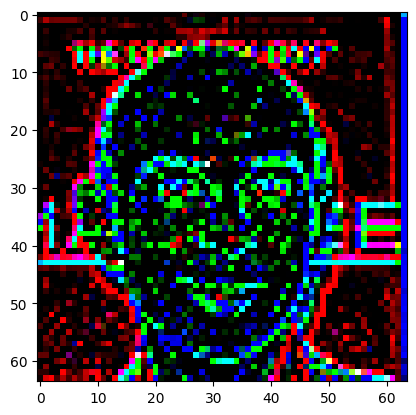

In [8]:
# open 998.npy from /mnt/g/data/latents/all
l = np.load('/mnt/g/data/latents/all/998.npy')

import matplotlib.pyplot as plt

l = l * 2 - 1

# permute to (3, 64, 64)
l = l.transpose(1, 2, 0)

plt.imshow(l)

In [1]:
from dataset.latent_image_dataset import LatentImageDataset

In [2]:
im_dataset = LatentImageDataset('/mnt/c/latents/ddim_250', split='val', target_attributes=['Eyeglasses'])

/mnt/d/projects/conditional_stable_diffusion/face-diffusion/dataset/latent_image_dataset.py:36: DtypeWarning: Columns (2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23) have mixed types. Specify dtype option on import or set low_memory=False.
  attributes_df = pd.read_csv(os.path.join(self.latent_path, 'attributes.csv'))


In [3]:
print(len(im_dataset))

39920


In [4]:
im_dataset[0]

(tensor([[[-1.8368, -0.9898, -1.3912,  ..., -0.6554, -1.2945, -0.1841],
          [-2.7461, -1.6730, -1.9973,  ..., -1.0218, -0.8115, -0.6513],
          [-2.1932, -1.3609, -1.7245,  ..., -2.2034, -0.6507, -0.6160],
          ...,
          [-2.5290, -1.7140, -1.8653,  ..., -1.9337, -1.9300, -1.2450],
          [-2.1921, -1.6509, -2.0105,  ..., -1.1771, -2.0275, -1.2554],
          [-2.8260, -2.3177, -2.5368,  ..., -2.3687, -2.5303, -1.5309]],
 
         [[-1.7568, -1.1814, -0.7073,  ..., -0.2980, -0.7626, -0.3605],
          [-1.7510, -1.0399, -1.1341,  ..., -0.0544, -0.1977,  0.0357],
          [-1.5450, -0.5794, -1.3625,  ..., -1.5450, -0.8618,  0.4438],
          ...,
          [-1.2487, -2.0847, -1.2474,  ..., -0.9457, -1.4755, -1.4772],
          [-1.5364, -1.8509, -1.9987,  ..., -1.8321, -1.6882, -1.6573],
          [-1.3825, -1.3506, -1.6045,  ..., -1.0347, -1.2519, -0.9979]],
 
         [[ 0.7269,  0.5281,  0.1621,  ...,  0.0431,  0.2129,  0.1680],
          [ 0.8638,  0.3152,

In [11]:
from torch.utils.data import DataLoader

im_loader = DataLoader(im_dataset, batch_size=1024, shuffle=False)

In [13]:
eyeglasses = False
no_eyeglasses = False

for l, a in im_loader:
    # if eyeglasses is present
    print(a)
    

print(eyeglasses, no_eyeglasses)

tensor([[[[1.]]],


        [[[1.]]],


        [[[0.]]],


        ...,


        [[[1.]]],


        [[[0.]]],


        [[[1.]]]])


KeyboardInterrupt: 

In [1]:
import pandas as pd

df = pd.read_csv('/mnt/g/data/latents/all/attributes.csv')



/tmp/ipykernel_592/3593556655.py:3: DtypeWarning: Columns (0,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/mnt/g/data/latents/all/attributes.csv')


In [2]:
len(df)

2000039

In [3]:
df = df[df['file_name'] != 'file_name']

In [4]:
len(df)

2000000

In [5]:
# add a column for id
df['id'] = df['file_name'].apply(lambda x: int(x.split('.')[0]))

In [6]:
df.head()

,id,file_name,origin_name,Male,Young,Bald,Bangs,Receding_Hairline,Black_Hair,Blond_Hair,...,Goatee,Mustache,Sideburns,Narrow_Eyes,Oval_Face,Pale_Skin,Pointy_Nose,Eyeglasses,Heavy_Makeup,Wearing_Lipstick
0,0,0.npy,ddim_inter_latents/all/latents_glasses_interme...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,1,1.npy,ddim_inter_latents/all/latents_glasses_interme...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,2,2.npy,ddim_inter_latents/all/latents_glasses_interme...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,3,3.npy,ddim_inter_latents/all/latents_glasses_interme...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,4,4.npy,ddim_inter_latents/all/latents_glasses_interme...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [7]:
# check if index is equal to id in every row
df['id'].equals(df.index)

# correct index
df.set_index('id', inplace=True)


In [12]:
df['id'].equals(df.index)

KeyError: 'id'

In [8]:
# save corrected csv
df.to_csv('/mnt/g/data/latents/all/attributes.csv')

In [1]:
from dataset.latent_image_dataset import LatentImageDataset

im_dataset = LatentImageDataset('/mnt/g/data/latents/700/processed/big_nose', split='train', target_attributes=['Big_Nose'])

/mnt/g/projects/face-diffusion/dataset/latent_image_dataset.py:77: DtypeWarning: Columns (0,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22) have mixed types. Specify dtype option on import or set low_memory=False.
  attributes_df = pd.read_csv(os.path.join(self.latent_path, 'attributes.csv'))


In [2]:
# calculate mean and std of images
import torch
from tqdm import tqdm

mean = torch.zeros(3)
std = torch.zeros(3)
n = 0

glasses = 0
no_glasses = 0

for l, a in tqdm(im_dataset, total=len(im_dataset)):

    if a[0] == 1 and glasses < 1000000:
        glasses += 1
        mean += l.mean(dim=(1, 2))
        std += l.std(dim=(1, 2))
        n += 1
    elif a[0] == 0 and no_glasses < 1000000:
        no_glasses += 1
        mean += l.mean(dim=(1, 2))
        std += l.std(dim=(1, 2))
        n += 1

    



mean /= n
std /= n

  0%|          | 0/450000 [00:00<?, ?it/s]

100%|██████████| 450000/450000 [1:07:45<00:00, 110.69it/s]


In [3]:
print(mean, std)

tensor([-0.5027,  0.0582,  0.0977]) tensor([0.4988, 0.4093, 0.4814])


300epoch - 200000k elemből

tensor([-0.5047, -0.2201,  0.0777]) tensor([1.0066, 0.8887, 0.6669])


700epoch - minden elemből - glasses

tensor([0.0138, 0.3183, 0.0351]) tensor([0.5042, 0.4622, 0.7206])

tensor([-0.4908,  0.0627,  0.1011]) tensor([0.5076, 0.4108, 0.4806])

smiling

tensor([-0.5099,  0.0534,  0.0902]) tensor([0.4977, 0.4097, 0.4811])

chubby

tensor([-0.4932,  0.0717,  0.0965]) tensor([0.5124, 0.4079, 0.4835])

big nose
tensor([-0.5027,  0.0582,  0.0977]) tensor([0.4988, 0.4093, 0.4814])